In [22]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
%matplotlib inline
import seaborn as sns
import warnings
from fbprophet import Prophet as proph
import pickle

plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [7]:
%run ./updated_zillow_data.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Columns: 287 entries, RegionID to 2019-07
dtypes: float64(231), int64(52), object(4)
memory usage: 34.5+ MB


In [134]:
with open('train.pickle', 'rb') as f:
    train_df = pickle.load(f)

with open('test.pickle', 'rb') as f:
    test_df = pickle.load(f)

In [135]:
train_df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84654,1,2012-01-01,739600.0
1,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91982,2,2012-01-01,248800.0
2,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84616,3,2012-01-01,931300.0
3,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91940,4,2012-01-01,116000.0
4,79936,El Paso,TX,El Paso,El Paso County,93144,5,2012-01-01,112400.0


In [186]:
train_df[train_df.columns[-2]]

0         2012-01-01
1         2012-01-01
2         2012-01-01
3         2012-01-01
4         2012-01-01
5         2012-01-01
6         2012-01-01
7         2012-01-01
8         2012-01-01
9         2012-01-01
10        2012-01-01
11        2012-01-01
12        2012-01-01
13        2012-01-01
14        2012-01-01
15        2012-01-01
16        2012-01-01
17        2012-01-01
18        2012-01-01
19        2012-01-01
20        2012-01-01
21        2012-01-01
22        2012-01-01
23        2012-01-01
24        2012-01-01
25        2012-01-01
26        2012-01-01
27        2012-01-01
28        2012-01-01
29        2012-01-01
             ...    
1118362   2017-11-01
1118363   2017-11-01
1118364   2017-11-01
1118365   2017-11-01
1118366   2017-11-01
1118367   2017-11-01
1118368   2017-11-01
1118369   2017-11-01
1118370   2017-11-01
1118371   2017-11-01
1118372   2017-11-01
1118373   2017-11-01
1118374   2017-11-01
1118375   2017-11-01
1118376   2017-11-01
1118377   2017-11-01
1118378   201

In [166]:
test_df['zipcode'] = 33805

In [136]:
test_df.head()

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
0,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84654,1,2017-12-01,1022800
1,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91982,2,2017-12-01,321100
2,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,84616,3,2017-12-01,1304500
3,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,91940,4,2017-12-01,172300
4,79936,El Paso,TX,El Paso,El Paso County,93144,5,2017-12-01,120200


In [227]:
train_df.loc[(train_df['RegionName'] == 29405)]

,RegionName,City,State,Metro,CountyName,RegionID,SizeRank,time,value
4299,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-01-01,NaN
20051,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-02-01,NaN
35803,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-03-01,NaN
51555,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-04-01,NaN
67307,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-05-01,NaN
83059,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-06-01,NaN
98811,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-07-01,NaN
114563,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-08-01,NaN
130315,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-09-01,NaN
146067,29405,North Charleston,SC,Charleston-North Charleston,Charleston County,70450,4300,2012-10-01,NaN


In [214]:
first_zip = train_df.loc[(train_df['RegionName'] == 29405)][['time', 'value']]

In [215]:
# Rename the columns [time, value] to [ds, y]
first_zip = first_zip.rename(columns={'time': 'ds',
                                      'value': 'y'})

In [216]:
first_zip

,ds,y
4299,2012-01-01,NaN
20051,2012-02-01,NaN
35803,2012-03-01,NaN
51555,2012-04-01,NaN
67307,2012-05-01,NaN
83059,2012-06-01,NaN
98811,2012-07-01,NaN
114563,2012-08-01,NaN
130315,2012-09-01,NaN
146067,2012-10-01,NaN


In [190]:
first_zip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 5977 to 1108617
Data columns (total 2 columns):
ds    71 non-null datetime64[ns]
y     71 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.7 KB


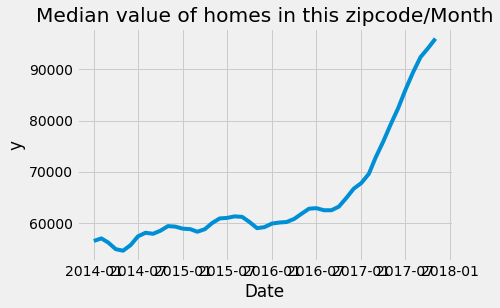

In [217]:
# Plot the timeseries 

idx = first_zip.set_index('ds')
sns.lineplot(idx.index, idx['y'])
plt.title('Median value of homes in this zipcode/Month')
plt.xlabel('Date')
plt.show();

In [218]:
Model = proph(interval_width=0.95)
Model.fit(first_zip)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [219]:
future_dates = Model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
102,2020-07-01
103,2020-08-01
104,2020-09-01
105,2020-10-01
106,2020-11-01


In [220]:
forecast = Model.predict(future_dates)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-01-01,72965.146878,71677.552420,73216.024242,72965.146878,72965.146878,-530.902810,-530.902810,-530.902810,-530.902810,-530.902810,-530.902810,0.0,0.0,0.0,72434.244068
1,2012-02-01,72333.971846,71233.458545,72723.274483,72333.971846,72333.971846,-368.495669,-368.495669,-368.495669,-368.495669,-368.495669,-368.495669,0.0,0.0,0.0,71965.476178
2,2012-03-01,71743.517785,69933.683394,71388.155493,71743.517785,71743.517785,-1077.254182,-1077.254182,-1077.254182,-1077.254182,-1077.254182,-1077.254182,0.0,0.0,0.0,70666.263603
3,2012-04-01,71112.342753,69473.909660,71025.320119,71112.342753,71112.342753,-848.314259,-848.314259,-848.314259,-848.314259,-848.314259,-848.314259,0.0,0.0,0.0,70264.028494
4,2012-05-01,70501.528206,69447.119526,70947.918497,70501.528206,70501.528206,-267.943169,-267.943169,-267.943169,-267.943169,-267.943169,-267.943169,0.0,0.0,0.0,70233.585038


In [221]:
# Subset above mentioned columns and view the tail 

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
102,2020-07-01,187305.089292,145701.058037,225232.136876
103,2020-08-01,189845.882824,146325.559120,229723.532975
104,2020-09-01,192475.431008,146476.993962,234665.544489
105,2020-10-01,195062.571702,146957.957234,239171.977129
106,2020-11-01,198075.514453,148116.907861,243834.035923


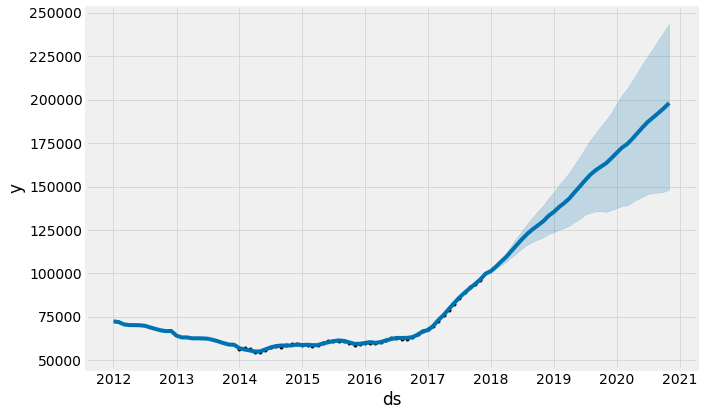

In [222]:
Model.plot(forecast, uncertainty=True)
plt.show()

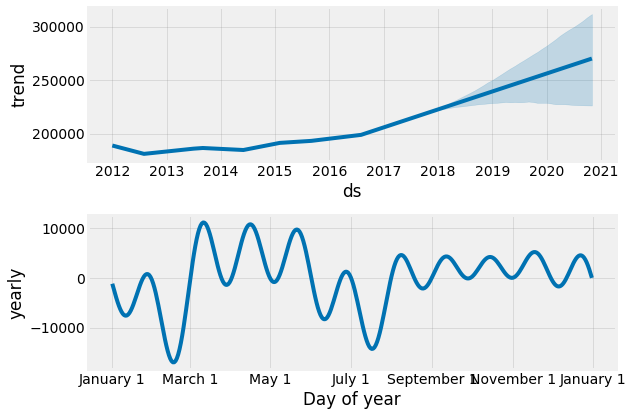

In [40]:
Model.plot_components(forecast)
plt.show()

In [64]:
annualised_returns = pd.read_csv('zipcode_annualised_returns_2012_2018.csv')
annualised_returns.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
annualised_returns = annualised_returns.sort_values(['Ann_returns'], ascending=False)

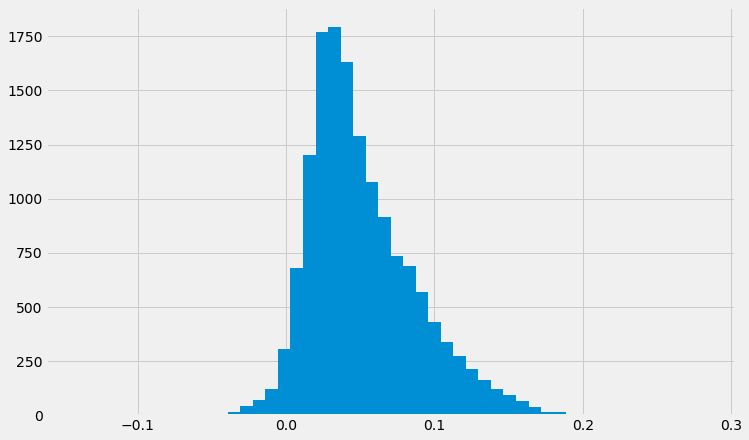

In [89]:
plt.figure(figsize=(11, 7))
plt.hist(annualised_returns['Ann_returns'], bins=50);

In [137]:
over15pct = list(annualised_returns.loc[annualised_returns['Ann_returns'] > 0.15]['RegionName'])
print(len(over15pct))

202


In [159]:
unique = list((train_df['RegionName'].unique()))

In [146]:
intersection = list(set(over15pct).intersection(unique))

In [147]:
def retrieving_zipcode_info(df, intersection):
    
    forecasts = {}
    
    for zipcode in intersection:
        returns = df.loc[(df['RegionName'] == zipcode)][['time', 'value']]
        returns = returns.rename(columns={'time': 'ds','value': 'y'})

        Model = proph(interval_width=0.95)
        Model.fit(returns)

        future_dates = Model.make_future_dataframe(periods=36, freq='MS')
        forecast = Model.predict(future_dates)

        forecasts[zipcode] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

    return forecasts

In [150]:
best_past_performers = retrieving_zipcode_info(train_df, intersection)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seaso

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [170]:
merged = pd.DataFrame(data=None)
for i in best_past_performers.keys():
    df = best_past_performers[i]
    df['zipcode'] = i
    merged = pd.concat([merged, df], axis=0)

In [173]:
merged

,ds,yhat,yhat_lower,yhat_upper,zipcode
0,2012-01-01,41912.496068,40623.446875,43303.681271,33805
1,2012-02-01,42325.008702,40980.131632,43632.717771,33805
2,2012-03-01,43337.713585,41963.445935,44718.956329,33805
3,2012-04-01,43793.688528,42461.076679,45067.122048,33805
4,2012-05-01,44173.352998,42686.867106,45471.283180,33805
5,2012-06-01,44993.212307,43635.078138,46355.117725,33805
6,2012-07-01,46459.826341,45178.543489,47750.025595,33805
7,2012-08-01,47673.595718,46379.108854,49027.653395,33805
8,2012-09-01,47555.912878,46172.542226,48914.818222,33805
9,2012-10-01,47591.463962,46174.842756,48996.625361,33805


In [197]:
from datetime import datetime

years = range(2017, 2021)
year_month_list = [datetime.strptime(f'{year}-11-01', '%Y-%m-%d').date() for year in years]
forecast_returns = merged.loc[merged['ds'].isin(year_month_list)]

In [199]:
forecast_returns['pred_returns'] = forecast_returns['yhat'].div(
    forecast_returns.groupby('zipcode')['yhat'].shift(1))

In [205]:
forecast_returns = forecast_returns.dropna(subset=['pred_returns'])

In [208]:
def predicted_annualised_returns(df):
    pred_annualised_return = {}
    for zipcode in df['zipcode']:
        returns = list(df.loc[(df['zipcode'] == zipcode)]['pred_returns'])
        
        tot_return = 1
        for r in returns:
            tot_return = tot_return * r 
        
        pred_annualised = (tot_return ** (1/len(returns))) - 1
        pred_annualised_return[zipcode] = pred_annualised 
        
    return pred_annualised_return

In [209]:
forecast_returns = predicted_annualised_returns(forecast_returns)

In [211]:
forecast_returns_df = pd.DataFrame(list(forecast_returns.items()),
                                      columns=['zipcode', 'Pred_ann_returns'])

In [213]:
forecast_returns_df.sort_values('Pred_ann_returns', ascending=False)

,zipcode,Pred_ann_returns
95,29405,0.270488
149,32117,0.210525
0,33805,0.206310
25,66102,0.204467
110,33069,0.193098
14,33830,0.187863
125,30032,0.181486
37,30288,0.180484
13,33313,0.172206
196,32744,0.171731


(array([ 7., 51., 54., 49., 21., 11.,  3.,  3.,  0.,  1.]),
 array([0.04588095, 0.06834168, 0.09080242, 0.11326316, 0.13572389,
        0.15818463, 0.18064537, 0.2031061 , 0.22556684, 0.24802757,
        0.27048831]),
 <a list of 10 Patch objects>)

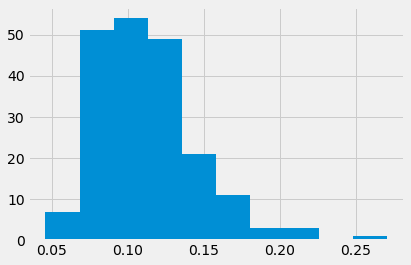

In [223]:
plt.hist(forecast_returns_df['Pred_ann_returns'])

In [228]:
top_forecast_returns_df = forecast_returns_df.loc[forecast_returns_df['Pred_ann_returns'] > 0.15]

In [229]:
top_forecast_returns_df

,zipcode,Pred_ann_returns
0,33805,0.206310
13,33313,0.172206
14,33830,0.187863
25,66102,0.204467
37,30288,0.180484
52,48237,0.168196
71,32905,0.163231
95,29405,0.270488
99,33020,0.159395
101,33023,0.163256


In [230]:
with open('pred_returns.pickle', 'wb') as f:
    pickle.dump(top_forecast_returns_df, f, pickle.HIGHEST_PROTOCOL)